In [1]:
pip install rasterio fiona eobox 

     |████████████████████████████████| 18.2MB 147kB/s 
     |████████████████████████████████| 14.7MB 213kB/s 
     |████████████████████████████████| 4.7MB 45.4MB/s 
     |████████████████████████████████| 962kB 52.2MB/s 
     |████████████████████████████████| 10.9MB 22.9MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!cp "/content/drive/My Drive/S2-IMAGES.zip" "/content/"
!cp "/content/drive/My Drive/LEM_2017_2018.zip" "/content"

In [6]:
!unzip /content/LEM_2017_2018.zip -d /content/shape
!unzip /content/S2-IMAGES.zip -d /content/images

Archive:  /content/LEM_2017_2018.zip
 extracting: /content/shape/LEM_2017_2018.cpg  
  inflating: /content/shape/LEM_2017_2018.dbf  
  inflating: /content/shape/LEM_2017_2018.prj  
  inflating: /content/shape/LEM_2017_2018.qpj  
  inflating: /content/shape/LEM_2017_2018.shp  
  inflating: /content/shape/LEM_2017_2018.shx  
Archive:  /content/S2-IMAGES.zip
   creating: /content/images/S2-IMAGES/
   creating: /content/images/S2-IMAGES/S03/
  inflating: /content/images/S2-IMAGES/S03/L2A_T23LMG_20170714T132231_B02_60m.jp2  
  inflating: /content/images/S2-IMAGES/S03/L2A_T23LMG_20170714T132231_B03_60m.jp2  
  inflating: /content/images/S2-IMAGES/S03/L2A_T23LMG_20170714T132231_B04_60m.jp2  
  inflating: /content/images/S2-IMAGES/S03/L2A_T23LMG_20170714T132231_B8A_60m.jp2  
   creating: /content/images/S2-IMAGES/S13/
  inflating: /content/images/S2-IMAGES/S13/T23LMG_20180219T132231_B02_60m.jp2  
  inflating: /content/images/S2-IMAGES/S13/T23LMG_20180219T132231_B03_60m.jp2  
  inflating: /cont

In [7]:
import matplotlib.pyplot as plt
import fiona
import rasterio
from rasterio.mask import mask
import numpy as np
from rasterio.plot import show
import fnmatch
import os
from eobox.raster import extraction
import geopandas as gpd

/usr/local/lib/python3.6/dist-packages/eobox/raster/gdalutils.py:19: UserWarning: Could not find the path of gdal_proximity.py: Searched in /usr/lib/python3/dist-packages/osgeo, /usr/lib/python3/dist-packages/GDAL*/scripts.
  f"{Path(gdal.__file__).parent}, {str(Path(gdal.__file__).parent.parent)+'/GDAL*/scripts'}.")
/usr/local/lib/python3.6/dist-packages/eobox/raster/gdalutils.py:19: UserWarning: Could not find the path of gdal_polygonize.py: Searched in /usr/lib/python3/dist-packages/osgeo, /usr/lib/python3/dist-packages/GDAL*/scripts.
  f"{Path(gdal.__file__).parent}, {str(Path(gdal.__file__).parent.parent)+'/GDAL*/scripts'}.")
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
shp1 = "/content/shape/LEM_2017_2018.shp"
sh = fiona.open(shp1)
shapes = [feature["geometry"] for feature in sh]

In [9]:
root = '/content/images/S2-IMAGES/'
data = []
for sub_dir in os.listdir(root):
  name_list = os.listdir(f'/content/images/S2-IMAGES/{sub_dir}/')
  name_list.sort()
  data.append([root+sub_dir+'/'+x for x in name_list])

In [10]:
for i in data:
  print(i)

['/content/images/S2-IMAGES/S15/T23LMG_20180311T132231_B02_60m.jp2', '/content/images/S2-IMAGES/S15/T23LMG_20180311T132231_B03_60m.jp2', '/content/images/S2-IMAGES/S15/T23LMG_20180311T132231_B04_60m.jp2', '/content/images/S2-IMAGES/S15/T23LMG_20180311T132231_B8A_60m.jp2']
['/content/images/S2-IMAGES/S22/T23LMG_20180520T132241_B02_60m.jp2', '/content/images/S2-IMAGES/S22/T23LMG_20180520T132241_B03_60m.jp2', '/content/images/S2-IMAGES/S22/T23LMG_20180520T132241_B04_60m.jp2', '/content/images/S2-IMAGES/S22/T23LMG_20180520T132241_B8A_60m.jp2']
['/content/images/S2-IMAGES/S16/T23LMG_20180321T132231_B02_60m.jp2', '/content/images/S2-IMAGES/S16/T23LMG_20180321T132231_B03_60m.jp2', '/content/images/S2-IMAGES/S16/T23LMG_20180321T132231_B04_60m.jp2', '/content/images/S2-IMAGES/S16/T23LMG_20180321T132231_B8A_60m.jp2']
['/content/images/S2-IMAGES/S24/T23LMG_20180609T132231_B02_60m.jp2', '/content/images/S2-IMAGES/S24/T23LMG_20180609T132231_B03_60m.jp2', '/content/images/S2-IMAGES/S24/T23LMG_201806

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 1830, 'height': 1830, 'count': 1, 'crs': CRS.from_epsg(32723), 'transform': Affine(60.0, 0.0, 399960.0,
       0.0, -60.0, 8700040.0), 'blockxsize': 192, 'blockysize': 192, 'tiled': True}


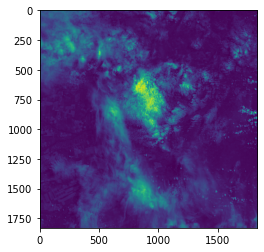

In [11]:
s2_img1 = '/content/images/S2-IMAGES/S18/T23LMG_20180410T132231_B02_60m.jp2'
raster = rasterio.open(s2_img1)
print(raster.profile)
plt.imshow(raster.read(1))

In [12]:
%time
s = os.listdir(root)
s.sort()
j = 0
for i in data:
  extraction.extract(src_vector=shp1,
                    burn_attribute="Id",
                    src_raster=i,
                    dst_names=["out_02","out_03","out_04"],
                    dst_dir=f"/content/out/{s[j]}/",
                    n_jobs=-1
                    )
  j += 1

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


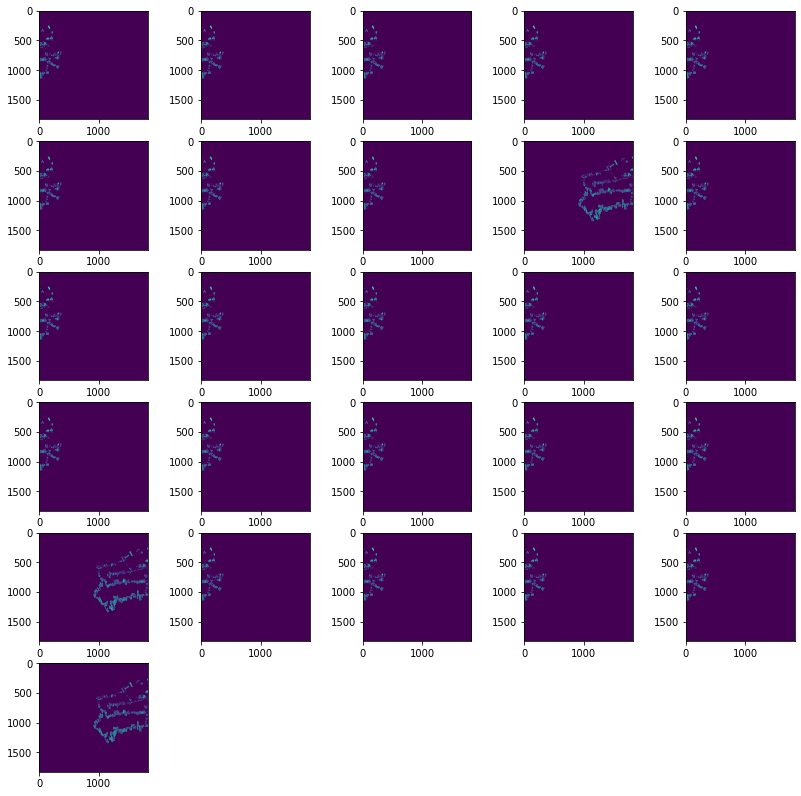

In [13]:
fig=plt.figure(figsize=(14, 14))
columns = 5
rows = 6
j = 0
rasters = []
for i in data:
    img_path = f"/content/out/{s[j]}/burn_attribute_rasterized_Id.tif"
    result_raster = rasterio.open(img_path)
    rasters.append(result_raster.read(1))
    fig.add_subplot(rows, columns, j+1)
    plt.imshow(result_raster.read(1))
    j +=1 

In [14]:
# #rasters = np.array(rasters)
# M = 30
# N = 30
# tiles = []
# for raster in rasters:
#  # im = raster
#   tiles.append([raster[x:x+M,y:y+N] for x in range(0,raster.shape[0],M) for y in range(0,raster.shape[1],N)])
#   #print(type(raster))

In [15]:
a = np.array(rasters[0])
a.shape

(1830, 1830)

In [16]:
for raster in rasters:
  print(raster)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

In [17]:
bands = []
for i in data:
  b02 = i[0]
  b03 = i[1]
  b04 = i[2]
  b02_raster = rasterio.open(b02).read(1)
  b03_raster = rasterio.open(b03).read(1)
  b04_raster = rasterio.open(b04).read(1)
  bands.append([b02_raster, b03_raster, b04_raster])
bands = np.array(bands)

In [18]:
bands = np.moveaxis(bands, 1, 3)

In [19]:
bands = bands/10000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


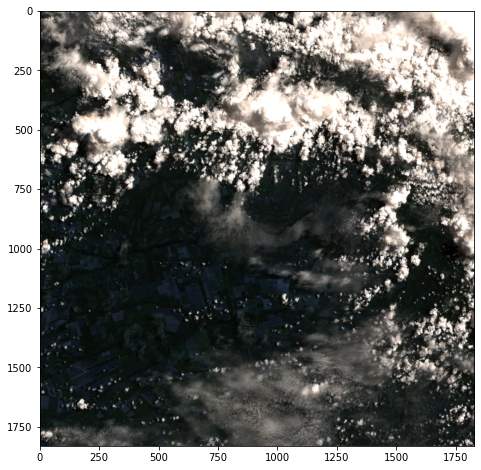

In [20]:
plt.figure(figsize = (8,8))
plt.imshow(bands[2])

In [21]:
rasters = np.array(rasters)

In [22]:
rasters.shape

(26, 1830, 1830)

In [23]:
rasters = np.where(rasters > 0, 1, 0)

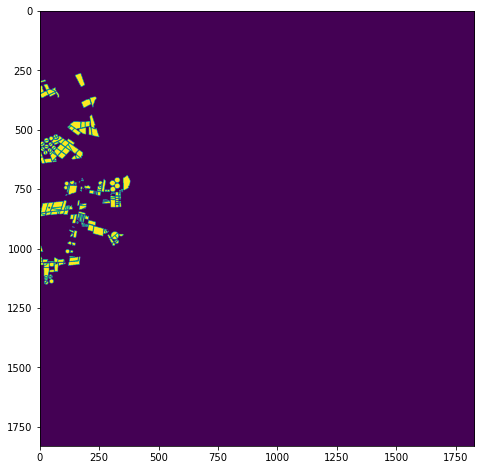

In [24]:
plt.figure(figsize = (8,8))
plt.imshow(np.squeeze(rasters[1]))

In [25]:
# M = 30
# N = 30
# i= 0
# tiles = []
# for raster in rasters:
#   im = np.squeeze(rasters[1])
# #plt.figure(figsize = (6,6))
# fig=plt.figure(figsize=(14, 14))
# tiles = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]


In [26]:
# tiles = np.array(tiles)
# tiles.shape

In [27]:
#plt.imshow(tiles[900])

In [28]:
# i = 0
# plt.figure(figsize = (14,14))
# for tile in tiles[500:900]:
#   plt.subplot(20,20, i+1)
#   plt.imshow(tile)
#   i+=1 

In [29]:
rasters = rasters.reshape(26,1830,1830,1)

In [30]:
indexes = [1, 3, 5, 7, 8, 9, 10, 11, 12, 13, 18, 21, 24, 25]
n_bands = np.array([bands[i] for i in indexes])
n_rasters = np.array([rasters[i] for i in indexes])

In [31]:
from skimage.io import imread, imshow
from skimage.transform import resize

x = []
y = []
for b, r in zip(n_bands, n_rasters):
  resized_b = resize(b, (512, 512), mode='constant', preserve_range=True)
  resized_r = resize(r, (512, 512), mode='constant', preserve_range=True)
  x.append(resized_b)
  y.append(resized_r)

x = np.array(x)
y = np.array(y)

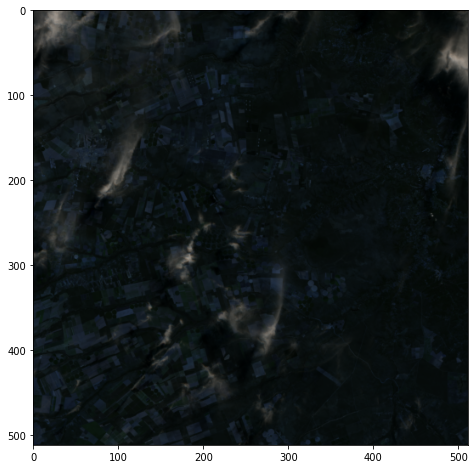

In [32]:
plt.figure(figsize = (8,8))

plt.imshow(x[0])

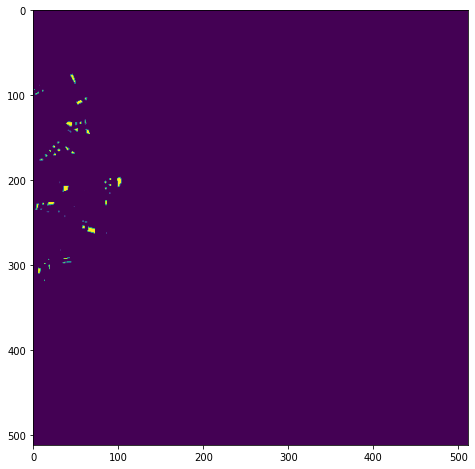

In [33]:
plt.figure(figsize = (8,8))
a = np.squeeze(y[0])
plt.imshow(a)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Model
from rasterio.mask import mask
from keras.layers import Conv2D, Conv2DTranspose, Input, MaxPooling2D, Dropout, Concatenate
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [36]:
x_train[0].shape

(512, 512, 3)

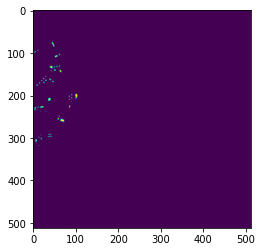

In [37]:
plt.imshow(np.squeeze(y_train[6]))

In [119]:
width = 512  #ainda não sei esses parametros direito
height = 512 #ainda não sei esses parametros direito
channels = 3 #ainda não sei esses parametros direito

def unet():
  inputs = Input((height, width, channels))
  s = "normalização dos dados aqui" #ainda não sei tbm

  #Encolhe
  c1 = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(inputs)
  c1 = Dropout(0.1)(c1)
  c1 = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(p1)
 # c2 = Dropout(0.1)(c2)
  c2 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(p2)
#  c3 = Dropout(0.1)(c3)
  c3 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(512, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(p3)
 # c4 = Dropout(0.1)(c4)
  c4 = Conv2D(512, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(1024, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(p4)
  #c5 = Dropout(0.1)(c5)
  c5 = Conv2D(1024, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c5)

  #Aumenta

  u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
  u6 = Concatenate()([u6, c4])
  c6 = Conv2D(512, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(u6)
  #c6 = Dropout(0.3)(c6)
  c6 = Conv2D(512, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c6)
  
  u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
  u7 = Concatenate()([u7, c3])
  c7 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(u7)
  #c7 = Dropout(0.2)(c7)
  c7 = Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c7)

  u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
  u8 = Concatenate()([u8, c2])
  c8 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(u8)
  #c8 = Dropout(0.1)(c8)
  c8 = Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c8)

  u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
  u9 = Concatenate()([u9, c1])
  c9 = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(u9)
  c9 = Dropout(0.1)(c9)
  c9 = Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer="he_normal")(c9)

  outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [120]:
model = unet()

In [121]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
callbacks = [EarlyStopping(patience=2, monitor='accuracy')]

In [123]:
history = model.fit(x_train[:6], y_train[:6], epochs=10, callbacks=callbacks, batch_size=128, shuffle=True)

Epoch 1/10
6/6 [==============================] - 2s 393ms/step - loss: 0.7188 - accuracy: 0.1312
Epoch 2/10
6/6 [==============================] - 2s 264ms/step - loss: 0.2471 - accuracy: 0.9969
Epoch 3/10
6/6 [==============================] - 1s 246ms/step - loss: 6.4248 - accuracy: 0.9970
Epoch 4/10
6/6 [==============================] - 2s 264ms/step - loss: 0.0293 - accuracy: 0.9970
Epoch 5/10
6/6 [==============================] - 2s 263ms/step - loss: 0.4340 - accuracy: 0.9970


In [124]:
pred = model.predict(x)
pred

array([[[[0.46243277],
         [0.42970216],
         [0.40773082],
         ...,
         [0.40007368],
         [0.43305886],
         [0.4581594 ]],

        [[0.4368012 ],
         [0.3963464 ],
         [0.3547546 ],
         ...,
         [0.3607723 ],
         [0.38637203],
         [0.44429973]],

        [[0.4430768 ],
         [0.37075487],
         [0.34433782],
         ...,
         [0.34626696],
         [0.35485387],
         [0.4332034 ]],

        ...,

        [[0.4401901 ],
         [0.4205953 ],
         [0.4014995 ],
         ...,
         [0.43423325],
         [0.4418096 ],
         [0.46961832]],

        [[0.45964533],
         [0.43246454],
         [0.41036835],
         ...,
         [0.45360968],
         [0.44638297],
         [0.46917605]],

        [[0.4781332 ],
         [0.46384567],
         [0.4630781 ],
         ...,
         [0.47418544],
         [0.47639993],
         [0.48262736]]],


       [[[0.47392076],
         [0.4561152 ],
         [0.44

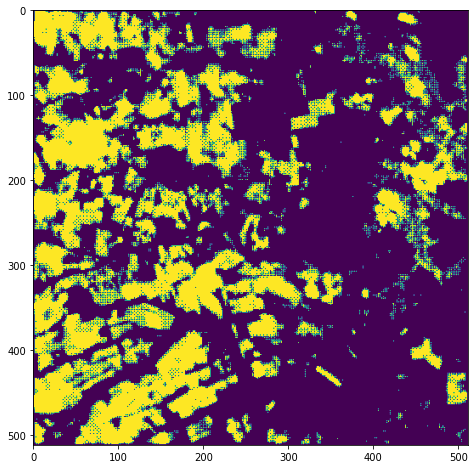

In [128]:
a = np.where(pred > 0.4, 0, 1)
plt.figure(figsize = (8,8))

plt.imshow(np.squeeze(a[3]))

In [129]:
model.save("unet_model.h5")

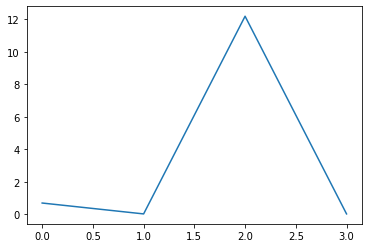

In [92]:
plt.plot(history.history['loss'])